In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime

In [2]:
dataset = pd.read_csv('Resources/BTC-USD.csv',index_col="Date",parse_dates=True)


In [3]:
dataset.head()


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-02-08,376.756989,379.878998,373.334015,373.446991,373.446991,47671100.0
2016-02-09,373.423004,377.246002,372.898010,376.028992,376.028992,55318500.0
2016-02-10,376.145996,385.483002,375.782990,381.648987,381.648987,85130896.0
2016-02-11,382.114014,383.130005,376.398987,379.653992,379.653992,74375600.0
2016-02-12,379.686005,384.954010,379.600006,384.263000,384.263000,67042800.0


In [87]:
train_bitcoin = dataset

In [88]:
dataset.isna().any()

Open                  True
High                  True
Low                   True
Close                 True
Adj Close             True
Volume                True
Close: 30 Day Mean    True
dtype: bool

In [89]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1828 entries, 2016-02-08 to 2021-02-08
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Open                1824 non-null   float64
 1   High                1824 non-null   float64
 2   Low                 1824 non-null   float64
 3   Close               1824 non-null   float64
 4   Adj Close           1824 non-null   float64
 5   Volume              1824 non-null   float64
 6   Close: 30 Day Mean  1735 non-null   float64
dtypes: float64(7)
memory usage: 114.2 KB


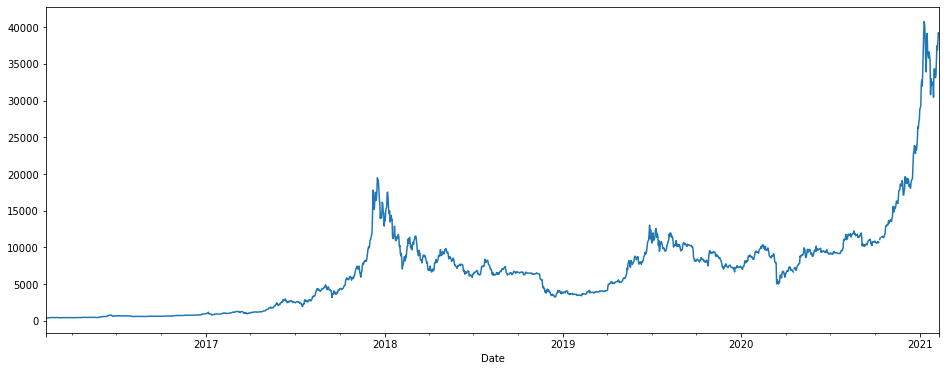

In [90]:
dataset['Open'].plot(figsize=(16,6))

In [91]:
# convert column "a" of a DataFrame
#dataset["Close"] = dataset["Close"].str.replace(',', '').astype(float)


In [92]:
#dataset["Volume"] = dataset["Volume"].str.replace(',', '').astype(float)

In [93]:
# 7 day rolling mean
dataset.rolling(7).mean().head(20)

,Open,High,Low,Close,Adj Close,Volume,Close: 30 Day Mean
Date,,,,,,,
2016-02-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-02-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-02-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-02-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-02-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-02-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-02-14,380.814144,387.111716,379.369572,384.875994,384.875994,6.656006e+07,NaN
2016-02-15,385.215716,391.469147,382.857426,388.695709,388.695709,7.033140e+07,NaN
2016-02-16,389.217002,395.997576,386.933712,393.189854,393.189854,7.287063e+07,NaN


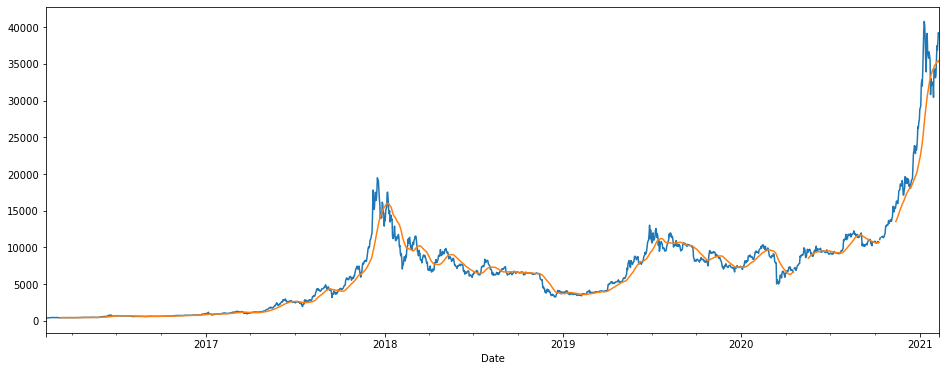

In [94]:
dataset['Open'].plot(figsize=(16,6))
dataset.rolling(window=30).mean()['Close'].plot()

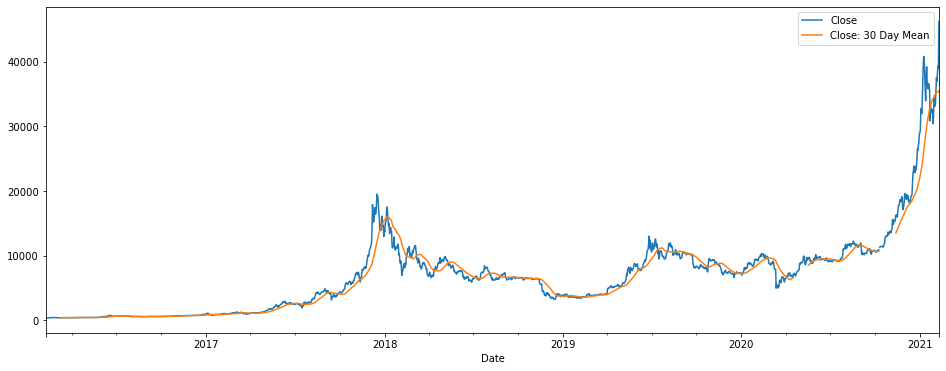

In [95]:
dataset['Close: 30 Day Mean'] = dataset['Close'].rolling(window=30).mean()
dataset[['Close','Close: 30 Day Mean']].plot(figsize=(16,6))

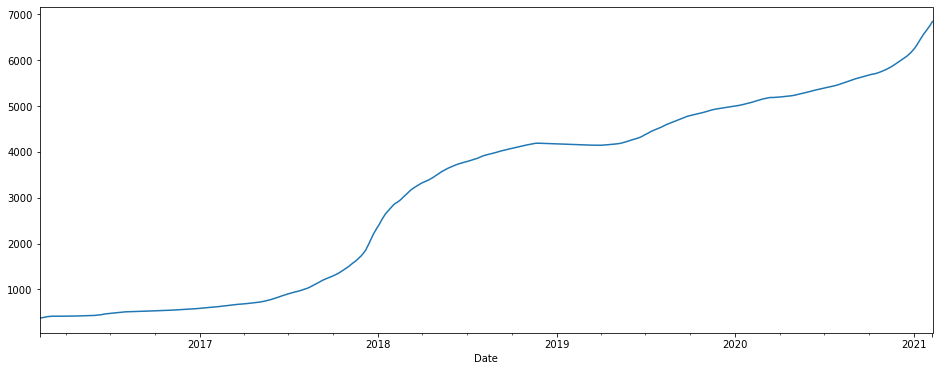

In [108]:
# specify a minimum number of periods
dataset['Open'].expanding(min_periods=1).mean().plot(figsize=(16,6))

In [109]:
training_set=dataset['Open']
training_set=pd.DataFrame(training_set)
training_set.head()

,Open
Date,
2016-02-08,376.756989
2016-02-09,373.423004
2016-02-10,376.145996
2016-02-11,382.114014
2016-02-12,379.686005


In [110]:
training_bitcoin = training_set

In [111]:
#training_bitcoin.to_csv('Output/training_bitcoin.csv')

In [112]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [113]:
# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [114]:
y_train

array([0.00122439, 0.00117253, 0.00114237, ..., 0.22510805, 0.2307319 ,
       0.25437282])

In [115]:
# Part 2 - Building the RNN

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout



In [116]:
# Initialising the RNN
regressor = Sequential()



In [117]:
# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))



In [118]:
# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)


Epoch 1/100
38/38 [==============================] - 10s 91ms/step - loss: 0.0072
Epoch 2/100
38/38 [==============================] - 4s 93ms/step - loss: 0.0012
Epoch 3/100
38/38 [==============================] - 3s 88ms/step - loss: 8.7581e-04
Epoch 4/100
38/38 [==============================] - 3s 89ms/step - loss: 8.2676e-04
Epoch 5/100
38/38 [==============================] - 3s 89ms/step - loss: 7.9416e-04
Epoch 6/100
38/38 [==============================] - 4s 103ms/step - loss: 8.6870e-04
Epoch 7/100
38/38 [==============================] - 3s 90ms/step - loss: 6.6071e-04
Epoch 8/100
38/38 [==============================] - 3s 88ms/step - loss: 6.3431e-04
Epoch 9/100
38/38 [==============================] - 3s 90ms/step - loss: 6.5721e-04
Epoch 10/100
38/38 [==============================] - 3s 91ms/step - loss: 5.6828e-04
Epoch 11/100
38/38 [==============================] - 3s 89ms/step - loss: 5.8459e-04
Epoch 12/100
38/38 [==============================] - 3s 88ms/step - 

38/38 [==============================] - 3s 85ms/step - loss: 1.7138e-04
Epoch 97/100
38/38 [==============================] - 3s 85ms/step - loss: 2.1305e-04
Epoch 98/100
38/38 [==============================] - 3s 84ms/step - loss: 2.7769e-04
Epoch 99/100
38/38 [==============================] - 3s 84ms/step - loss: 2.2617e-04
Epoch 100/100
38/38 [==============================] - 3s 83ms/step - loss: 3.0395e-04


In [119]:
# Part 3 - Making the predictions and visualising the results

# Getting the real stock price of 2020-21
dataset_test = pd.read_csv('Resources/BTC-USD-21.csv',index_col="Date",parse_dates=True)

dataset_test.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-03-05,48527.031250,49396.429688,46542.515625,48927.304688,48927.304688,48625928883
2021-03-06,48899.230469,49147.218750,47257.527344,48912.382813,48912.382813,34363564661
2021-03-07,48918.679688,51384.367188,48918.679688,51206.691406,51206.691406,43137459378
2021-03-08,51174.117188,52314.070313,49506.054688,52246.523438,52246.523438,48597428048
2021-03-09,52272.968750,54824.117188,51981.832031,54824.117188,54824.117188,50912227385


In [51]:
real_stock_price = dataset_test.iloc[:, 1:2].values

In [120]:
dataset_test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 29 entries, 2021-02-09 to 2021-03-09
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       29 non-null     float64
 1   High       29 non-null     float64
 2   Low        29 non-null     float64
 3   Close      29 non-null     float64
 4   Adj Close  29 non-null     float64
 5   Volume     29 non-null     int64  
dtypes: float64(5), int64(1)
memory usage: 1.6 KB


In [121]:
test_set=dataset_test['Open']
test_set=pd.DataFrame(test_set)

In [122]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 29 entries, 2021-02-09 to 2021-03-09
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    29 non-null     float64
dtypes: float64(1)
memory usage: 464.0 bytes


In [123]:
# Getting the predicted stock price of 2020-21
dataset_total = pd.concat((dataset['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 90):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [124]:
predicted_stock_price=pd.DataFrame(predicted_stock_price)


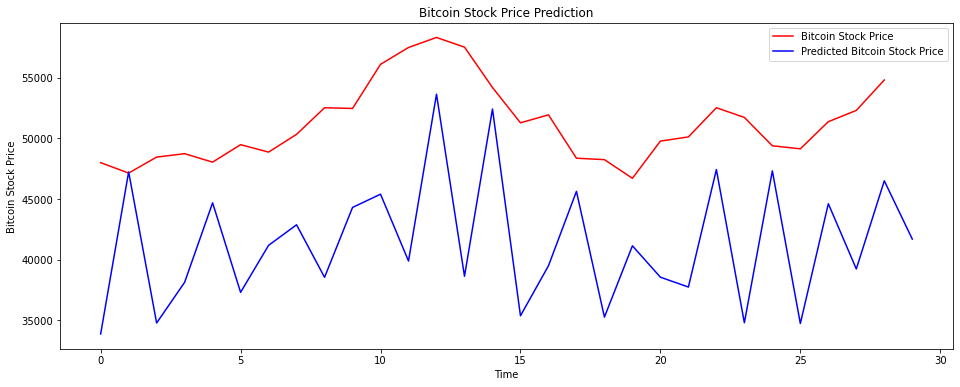

In [84]:

# Visualising the results
fig = plt.figure()

fig.set_size_inches(16, 6)


plt.plot(real_stock_price, color = 'red', label = 'Bitcoin Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Bitcoin Stock Price')
plt.title('Bitcoin Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Bitcoin Stock Price')
plt.legend()
plt.show()



